# 1. Income Statement
# Choose a public firm and import the Income Statement data to Python from Yahoo!Finance
# Analyze at least three items of the Income Statement and do a reasonal prediction for the next three years (It could be the prediction of one item using another item in the statement).
# Plot your results and summarize your findings.

Original Income Statement Data:
             Total Revenue Operating Income     Net Income
2024-12-31  637959000000.0    68593000000.0  59248000000.0
2023-12-31  574785000000.0    36852000000.0  30425000000.0
2022-12-31  513983000000.0    12248000000.0  -2722000000.0
2021-12-31  469822000000.0    24879000000.0  33364000000.0
2020-12-31             NaN              NaN            NaN

NaN values detected. Dropping incomplete data...


<ipython-input-25-da3885215517>:53: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')


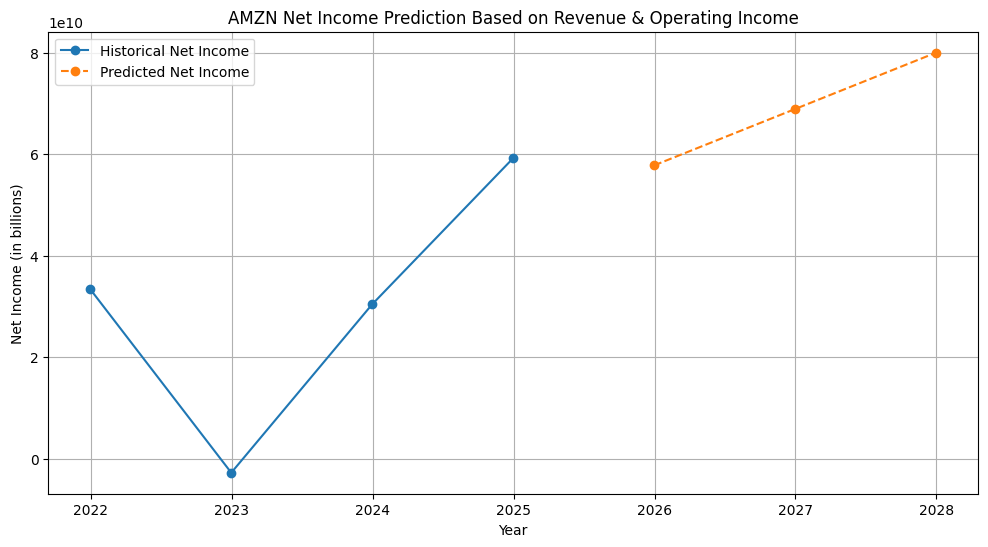


Predicted Net Income for the Next 3 Years:
2025: $57797357951.06 billion
2026: $68884801131.48 billion
2027: $79972244311.91 billion

--- Summary ---
This analysis used data from Yahoo! Finance for AMZN.
We analyzed three income statement items: Total Revenue, Operating Income, and Net Income.
A linear regression model was trained to predict Net Income based on Revenue and Operating Income.
The prediction shows a trend that is influenced by the patterns of the other two metrics.


In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Fetch income statement data
symbol = 'AMZN'  # You can replace this with any public company's ticker
company = yf.Ticker(symbol)
income_statement = company.financials

# 2. Select three items from the Income Statement
items = ['Total Revenue', 'Operating Income', 'Net Income']
data = income_statement.loc[items].transpose()

# 3. Clean and sort data
print("Original Income Statement Data:")
print(data)

# Drop rows with any NaN values
if data.isnull().any().any():
    print("\nNaN values detected. Dropping incomplete data...")
    data = data.dropna()

# Convert index to datetime and sort
data.index = pd.to_datetime(data.index)
data = data.sort_index()

# 4. Prepare features (X) and target (y) for prediction
X = data[['Total Revenue', 'Operating Income']].values  # Independent variables
y = data['Net Income'].values  # Dependent variable

# 5. Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# 6. Predict Net Income for next 3 years using projected revenue and operating income
# Simple assumption: linear trend for Revenue and Operating Income
years_to_predict = 3
future_X_indices = np.array(range(len(data), len(data) + years_to_predict)).reshape(-1, 1)

# Extend Revenue and Operating Income using linear models
rev_model = LinearRegression().fit(np.array(range(len(data))).reshape(-1, 1), data['Total Revenue'].values)
op_model = LinearRegression().fit(np.array(range(len(data))).reshape(-1, 1), data['Operating Income'].values)

future_revenue = rev_model.predict(future_X_indices)
future_operating_income = op_model.predict(future_X_indices)

future_X = np.column_stack((future_revenue, future_operating_income))
future_net_income = model.predict(future_X)

# 7. Prepare full series for plotting
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')

historical_net_income = pd.Series(y, index=data.index)
predicted_net_income = pd.Series(future_net_income, index=future_dates)

# 8. Plot the results
plt.figure(figsize=(12, 6))
plt.plot(historical_net_income.index, historical_net_income.values, label='Historical Net Income', marker='o')
plt.plot(predicted_net_income.index, predicted_net_income.values, label='Predicted Net Income', marker='o', linestyle='--')
plt.title(f"{symbol} Net Income Prediction Based on Revenue & Operating Income")
plt.xlabel("Year")
plt.ylabel("Net Income (in billions)")
plt.legend()
plt.grid(True)
plt.show()

# 9. Print predictions
print("\nPredicted Net Income for the Next 3 Years:")
for year, income in zip(predicted_net_income.index.year, predicted_net_income.values):
    print(f"{year}: ${income:.2f} billion")

# 10. Summary
print("\n--- Summary ---")
print(f"This analysis used data from Yahoo! Finance for {symbol}.")
print("We analyzed three income statement items: Total Revenue, Operating Income, and Net Income.")
print("A linear regression model was trained to predict Net Income based on Revenue and Operating Income.")
print("The prediction shows a trend that is influenced by the patterns of the other two metrics.")

In [2]:
import yfinance as yf
import pandas as pd

# Fetch income statement data
symbol = 'AMZN'
amazon = yf.Ticker(symbol)

# Get income statement data
income_statement = amazon.financials

# Display the income statement to check the available labels
print("Income Statement Data:")
print(income_statement)

# Check the correct label for COGS
if 'Cost Of Revenue' in income_statement.index:
    cogs_label = 'Cost Of Revenue'
elif 'Cost of Goods Sold' in income_statement.index:
    cogs_label = 'Cost of Goods Sold'
else:
    cogs_label = None
    print("COGS label not found in the income statement.")

if cogs_label:
    print(f"\nCOGS Data:")
    print(income_statement.loc[cogs_label].transpose())

Income Statement Data:
                                                            2024-12-31  \
Tax Effect Of Unusual Items                          -246971244.935436   
Tax Rate For Calcs                                            0.135031   
Normalized EBITDA                                       125644000000.0   
Total Unusual Items                                      -1829000000.0   
Total Unusual Items Excluding Goodwill                   -1829000000.0   
Net Income From Continuing Operation Net Minori...       59248000000.0   
Reconciled Depreciation                                  52795000000.0   
Reconciled Cost Of Revenue                              513337000000.0   
EBITDA                                                  123815000000.0   
EBIT                                                     71020000000.0   
Net Interest Income                                       2271000000.0   
Interest Expense                                          2406000000.0   
Interest Income

Amazon's COGS Data (in billions):
2024-12-31    513337000000.0
2023-12-31    480980000000.0
2022-12-31    446343000000.0
2021-12-31    403507000000.0
2020-12-31               NaN
Name: Cost Of Revenue, dtype: object



<ipython-input-3-16c03263f902>:44: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=cogs_data.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')


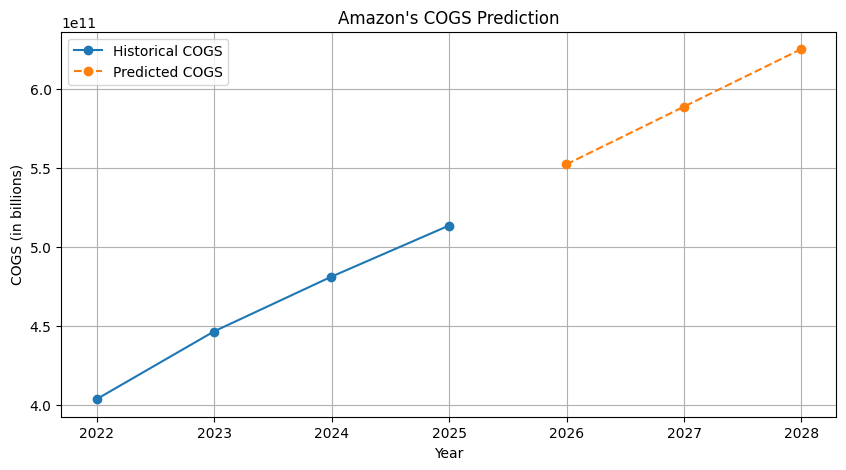


Predicted COGS for the Next 3 Years:
2025: $552073500000.00 billion
2026: $588486200000.00 billion
2027: $624898900000.00 billion


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fetch COGS data
symbol = 'AMZN'
amazon = yf.Ticker(symbol)

# Get income statement data (focus on COGS)
income_statement = amazon.financials
cogs_data = income_statement.loc['Cost Of Revenue'].transpose()

# Display the COGS data
print("Amazon's COGS Data (in billions):")
print(cogs_data)

# Check for NaN values in COGS data
if cogs_data.isnull().any():
    print("\nWarning: NaN values detected in COGS data. Handling them...")
    cogs_data = cogs_data.dropna()  # Drop rows with NaN values
    # Alternatively, you could fill NaN values with the mean or median:
    # cogs_data = cogs_data.fillna(cogs_data.mean())

# Prepare data for regression
# Convert index to datetime for better handling
cogs_data.index = pd.to_datetime(cogs_data.index)
cogs_data = cogs_data.sort_index()

# Create a numerical index for regression
X = np.array(range(len(cogs_data))).reshape(-1, 1)  # Independent variable (time)
y = cogs_data.values  # Dependent variable (COGS)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future COGS (for the next 3 years)
future_X = np.array(range(len(cogs_data), len(cogs_data) + 3)).reshape(-1, 1)  # Next 3 years
predicted_cogs = model.predict(future_X)

# Combine historical and predicted COGS
future_dates = pd.date_range(start=cogs_data.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')
predicted_cogs_series = pd.Series(predicted_cogs, index=future_dates)

# Plot historical and predicted COGS
plt.figure(figsize=(10, 5))
plt.plot(cogs_data.index, cogs_data.values, label='Historical COGS', marker='o')
plt.plot(predicted_cogs_series.index, predicted_cogs_series.values, label='Predicted COGS', marker='o', linestyle='--')
plt.title("Amazon's COGS Prediction")
plt.xlabel("Year")
plt.ylabel("COGS (in billions)")
plt.legend()
plt.grid()
plt.show()

# Print predicted COGS
print("\nPredicted COGS for the Next 3 Years:")
for year, cogs in zip(predicted_cogs_series.index.year, predicted_cogs_series.values):
    print(f"{year}: ${cogs:.2f} billion")

Amazon's COGS Data (in billions):
2024-12-31    513337000000.0
2023-12-31    480980000000.0
2022-12-31    446343000000.0
2021-12-31    403507000000.0
2020-12-31               NaN
Name: Cost Of Revenue, dtype: object

Amazon's Revenue Data (in billions):
2024-12-31    637959000000.0
2023-12-31    574785000000.0
2022-12-31    513983000000.0
2021-12-31    469822000000.0
2020-12-31               NaN
Name: Total Revenue, dtype: object



<ipython-input-4-52c515103bab>:52: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=revenue_data.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')


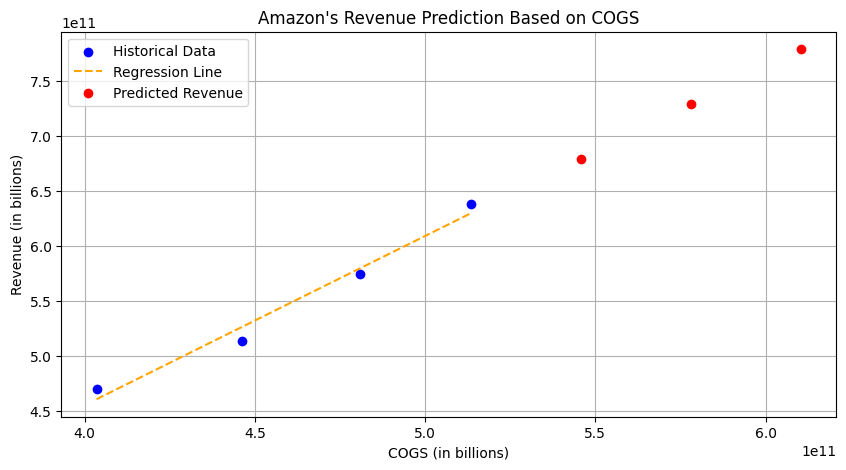


Predicted Revenues for the Next 3 Years Based on COGS:
2025: $679274744725.07 billion
2026: $729017768883.55 billion
2027: $778760793042.02 billion


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fetch financial data
symbol = 'AMZN'
amazon = yf.Ticker(symbol)

# Get income statement data (focus on COGS and Revenues)
income_statement = amazon.financials
cogs_data = income_statement.loc['Cost Of Revenue'].transpose()
revenue_data = income_statement.loc['Total Revenue'].transpose()

# Display the COGS and revenue data
print("Amazon's COGS Data (in billions):")
print(cogs_data)
print("\nAmazon's Revenue Data (in billions):")
print(revenue_data)

# Prepare data for regression
cogs_data.index = pd.to_datetime(cogs_data.index)
revenue_data.index = pd.to_datetime(revenue_data.index)

# Check for NaN values and handle them (drop NaN values)
if cogs_data.isnull().any() or revenue_data.isnull().any():
    print("\nWarning: NaN values detected in COGS or Revenue. Handling them...")
    # Drop rows where either COGS or Revenue is NaN
    valid_rows = ~cogs_data.isnull() & ~revenue_data.isnull()
    cogs_data = cogs_data[valid_rows]
    revenue_data = revenue_data[valid_rows]

# Sort the data by date
cogs_data = cogs_data.sort_index()
revenue_data = revenue_data.sort_index()

# Create a numerical index for regression
X = cogs_data.values.reshape(-1, 1)  # Independent variable (COGS)
y = revenue_data.values  # Dependent variable (Revenue)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future revenues based on hypothetical future COGS
# Assuming future COGS increase linearly based on the last known value
future_cogs = np.array([cogs_data.values[-1] + i * (cogs_data.values[-1] - cogs_data.values[-2]) for i in range(1, 4)]).reshape(-1, 1)
predicted_revenue = model.predict(future_cogs)

# Combine historical and predicted revenues
future_dates = pd.date_range(start=revenue_data.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')
predicted_revenue_series = pd.Series(predicted_revenue, index=future_dates)

# Plot historical COGS vs. Revenue
plt.figure(figsize=(10, 5))
plt.scatter(cogs_data, revenue_data, label='Historical Data', color='blue')
plt.plot(cogs_data, model.predict(X), label='Regression Line', color='orange', linestyle='--')
plt.scatter(future_cogs, predicted_revenue, label='Predicted Revenue', color='red', marker='o')
plt.title("Amazon's Revenue Prediction Based on COGS")
plt.xlabel("COGS (in billions)")
plt.ylabel("Revenue (in billions)")
plt.legend()
plt.grid()
plt.show()

# Print predicted revenues
print("\nPredicted Revenues for the Next 3 Years Based on COGS:")
for year, revenue in zip(predicted_revenue_series.index.year, predicted_revenue_series.values):
    print(f"{year}: ${revenue:.2f} billion")

# 2. Balance Sheet
# Choose a public firm and import the Balance Sheet data to Python from Yahoo!Finance
# Analyze at least three items of the Balance Sheet and plot the trend of them.
# Write a summary of your findings.

In [5]:
import yfinance as yf

# Define the ticker symbol for Amazon Inc.
ticker_symbol = 'AMZN'

# Fetch the data
amazon = yf.Ticker(ticker_symbol)

# Get the balance sheet
balance_sheet = amazon.balance_sheet

# Print the balance sheet
print("Balance Sheet for Amazon Inc. (AMZN):")
print(balance_sheet)

Balance Sheet for Amazon Inc. (AMZN):
                                                      2024-12-31  \
Treasury Shares Number                               515000000.0   
Ordinary Shares Number                             10593000000.0   
Share Issued                                       11108000000.0   
Net Debt                                                     NaN   
Total Debt                                        130900000000.0   
...                                                          ...   
Allowance For Doubtful Accounts Receivable         -2000000000.0   
Gross Accounts Receivable                          57451000000.0   
Cash Cash Equivalents And Short Term Investments  101202000000.0   
Other Short Term Investments                       22423000000.0   
Cash And Cash Equivalents                          78779000000.0   

                                                      2023-12-31  \
Treasury Shares Number                               515000000.0   
Ordinary 

Available labels in the balance sheet:
Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Stockholders Equity',
       'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Treasury Stock', 'Retained Earnings',
       'Additional Paid In Capital', 'Capital Stock', 'Common Stock',
       'Preferred Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long Term Debt',
       'Current Liabilities', 'Current Deferred Liabilities',
       'Current Deferred Revenue', 'Payables And Accrued Ex

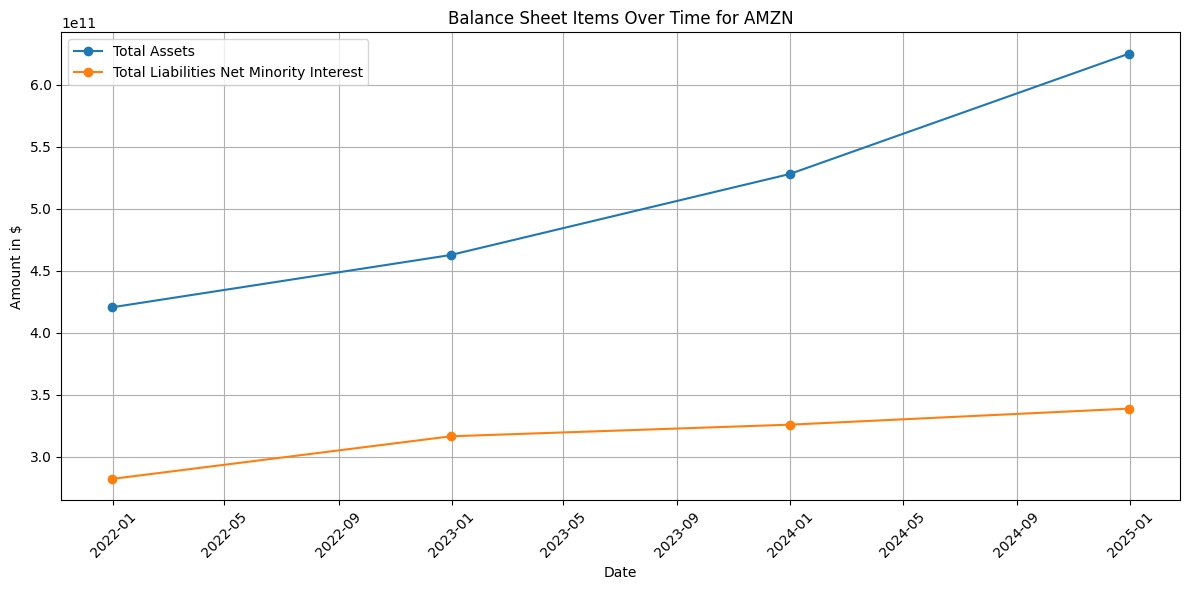

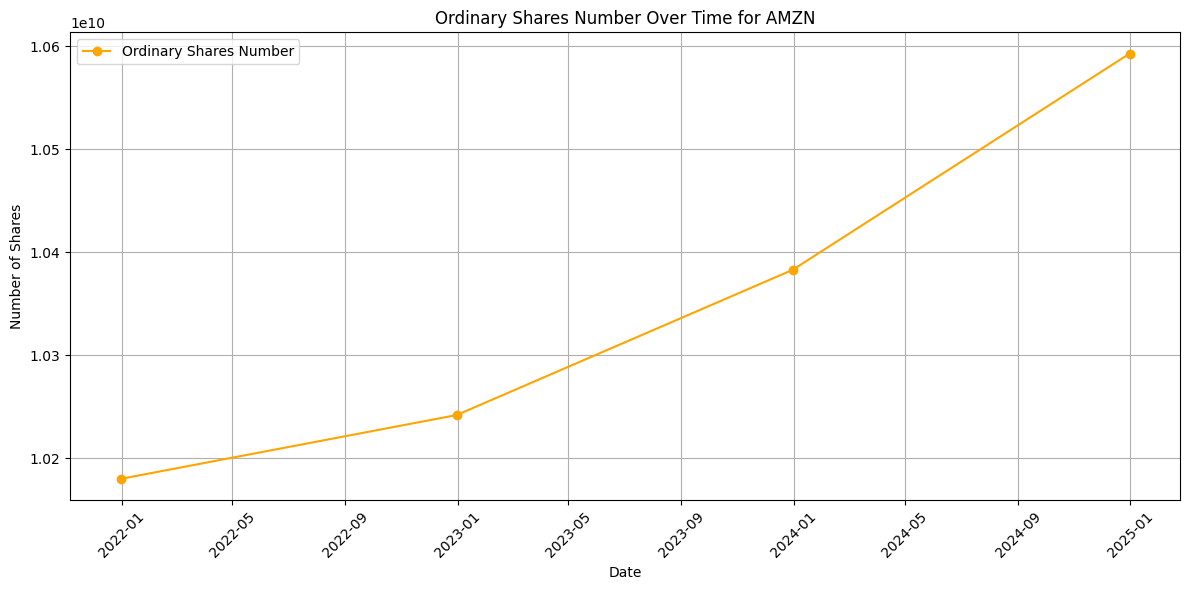

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for Amazon Inc.
ticker_symbol = 'AMZN'

# Fetch the data
amazon = yf.Ticker(ticker_symbol)

# Get the balance sheet
balance_sheet = amazon.balance_sheet

# Transpose the DataFrame to make it easier to work with
balance_sheet = balance_sheet.transpose()

# Print the available labels in the balance sheet
print("Available labels in the balance sheet:")
print(balance_sheet.columns)

# Select important items based on the available labels
# You can update these labels based on the output from the print statement above
important_items = ['Total Assets', 'Total Liabilities Net Minority Interest']
selected_data = balance_sheet[important_items]

# Convert the index to datetime
selected_data.index = pd.to_datetime(selected_data.index)

# Plotting Total Assets and Total Liabilities
plt.figure(figsize=(12, 6))
for item in important_items:
    plt.plot(selected_data.index, selected_data[item], marker='o', label=item)

plt.title(f'Balance Sheet Items Over Time for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Amount in $')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Ordinary Shares Number in a separate chart
if 'Ordinary Shares Number' in balance_sheet.columns:
    ordinary_shares = balance_sheet['Ordinary Shares Number']
    ordinary_shares.index = pd.to_datetime(ordinary_shares.index)

    plt.figure(figsize=(12, 6))
    plt.plot(ordinary_shares.index, ordinary_shares, marker='o', color='orange', label='Ordinary Shares Number')

    plt.title(f'Ordinary Shares Number Over Time for {ticker_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Number of Shares')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Ordinary Shares Number data not available in the balance sheet.")

# 3. Financial Ratios
# Choose a public firm and import the Balance Sheet and Income Statement data to Python from Yahoo!Finance
# Analyze at least three Financial Ratios that you want to show your clients.
# Plot the trend of those ratios and write a summary of your findings.

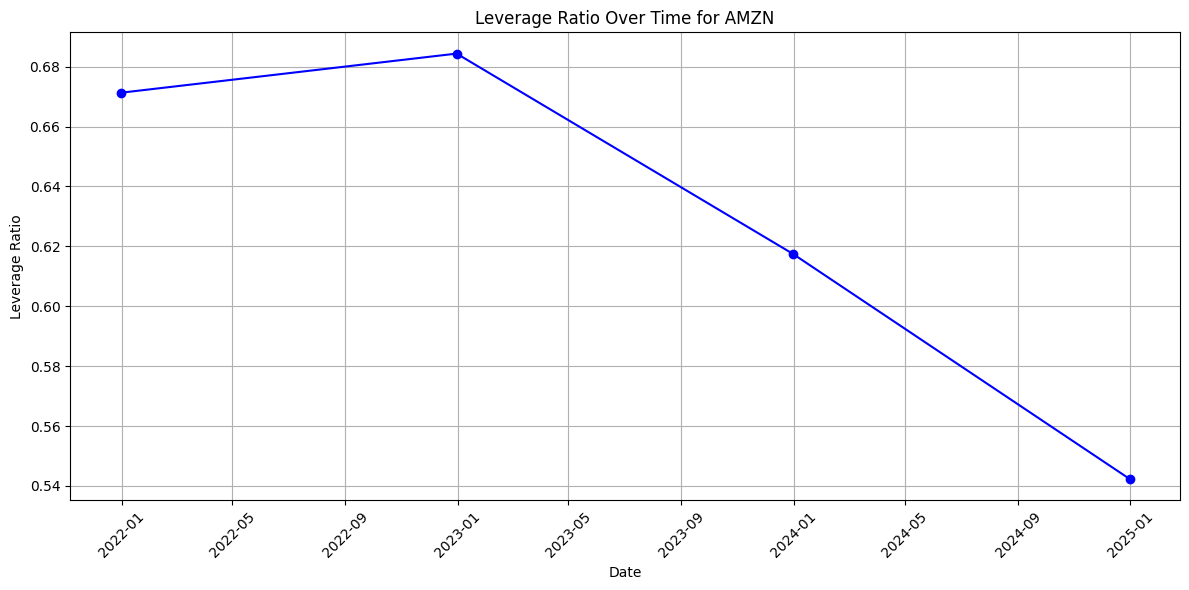

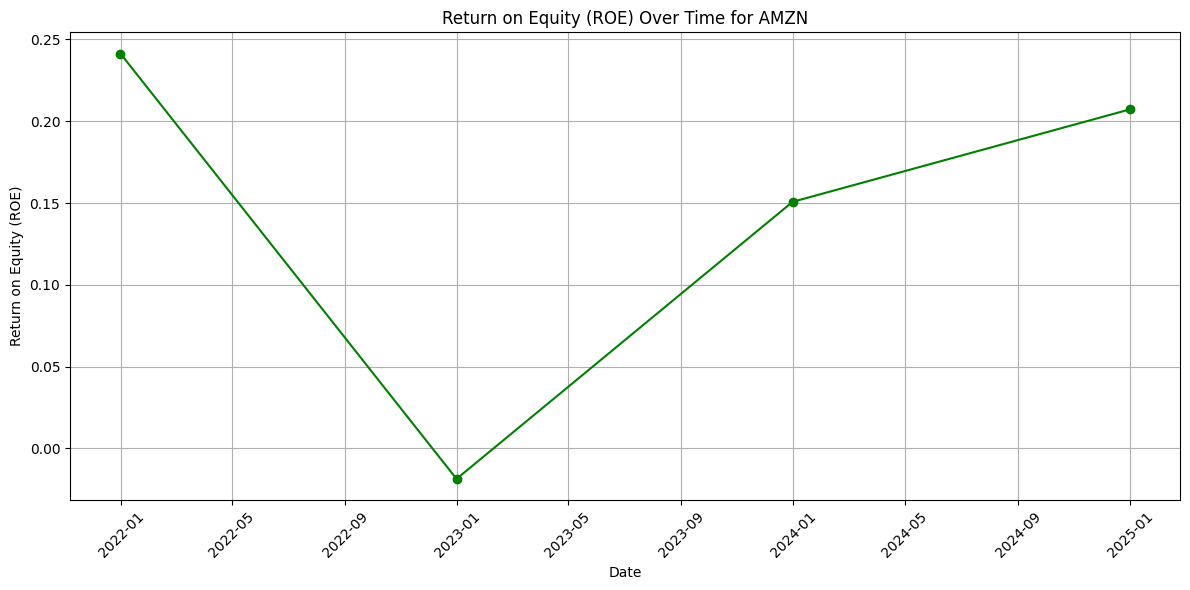

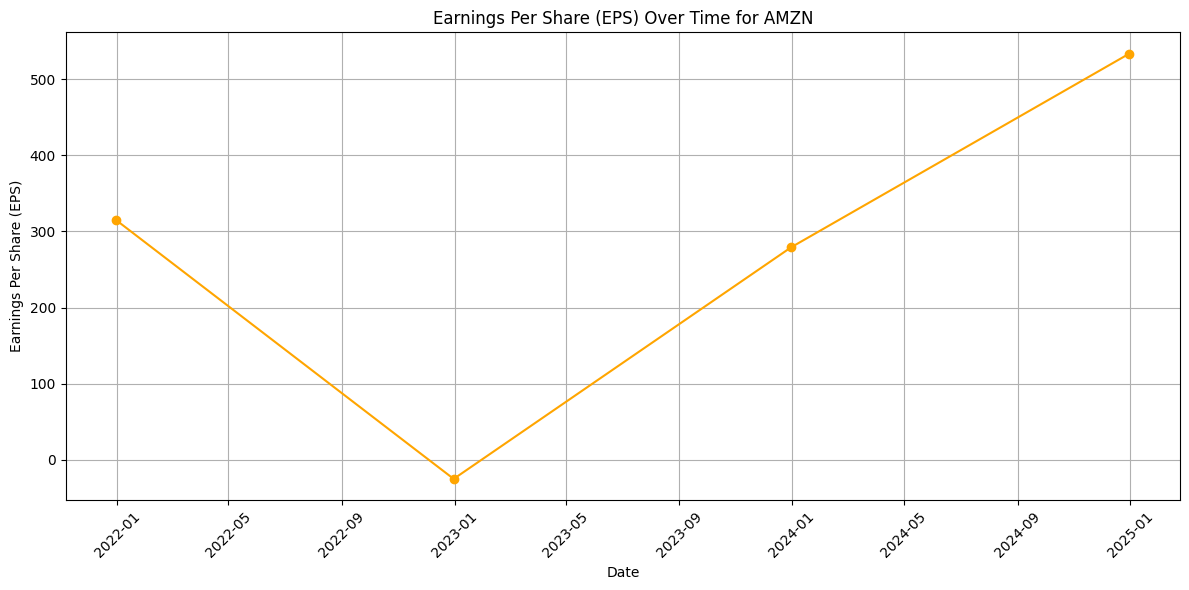

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for Amazon Inc.
ticker_symbol = 'AMZN'

# Fetch the data
amazon = yf.Ticker(ticker_symbol)

# Get the balance sheet and income statement
balance_sheet = amazon.balance_sheet.transpose()
income_statement = amazon.financials.transpose()

# Convert the index to datetime for easier plotting
balance_sheet.index = pd.to_datetime(balance_sheet.index)
income_statement.index = pd.to_datetime(income_statement.index)

# Select important items for calculations
total_assets = balance_sheet['Total Assets']
total_liabilities = balance_sheet['Total Liabilities Net Minority Interest']
shareholder_equity = total_assets - total_liabilities  # Calculate Shareholder's Equity

net_income = income_statement['Net Income']
ordinary_shares = balance_sheet['Common Stock']

# Calculate metrics
leverage_ratio = total_liabilities / total_assets
roe = net_income / shareholder_equity
eps = net_income / ordinary_shares

# Create a DataFrame for metrics
metrics = pd.DataFrame({
    'Leverage Ratio': leverage_ratio,
    'Return on Equity (ROE)': roe,
    'Earnings Per Share (EPS)': eps
})

# Plotting Leverage Ratio
plt.figure(figsize=(12, 6))
plt.plot(metrics.index, metrics['Leverage Ratio'], marker='o', color='blue')
plt.title(f'Leverage Ratio Over Time for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Leverage Ratio')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting Return on Equity (ROE)
plt.figure(figsize=(12, 6))
plt.plot(metrics.index, metrics['Return on Equity (ROE)'], marker='o', color='green')
plt.title(f'Return on Equity (ROE) Over Time for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Return on Equity (ROE)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting Earnings Per Share (EPS)
plt.figure(figsize=(12, 6))
plt.plot(metrics.index, metrics['Earnings Per Share (EPS)'], marker='o', color='orange')
plt.title(f'Earnings Per Share (EPS) Over Time for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Earnings Per Share (EPS)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 4. Ratio Analysis

# 5. Present EPS surprises for the past 10 quarters of a public company.

In [8]:
pip install openpyxl

In [15]:
# download the estimates history and ratio analysis from Factset. You may want to use Python 3.9.6
# I rename the Excel of estimates history as "EPSestimates", and the file of ratio analysis as "Ratios"
import pandas as pd

# Load Excel file, skipping the first 7 rows
df = pd.read_excel("Ratios.xlsx", skiprows=7)

# Transpose the data
df_transposed = df.transpose()

# Set first row as new headers
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:]

# Reset index to make the transposed index (original column headers) into a column
df_transposed = df_transposed.reset_index()

# Rename the first column to 'Date' — this is the old index
df_transposed.rename(columns={df_transposed.columns[0]: 'Date'}, inplace=True)

print(df_transposed['Date'].unique())

["DEC '24" "SEP '24" "JUN '24" "MAR '24" "DEC '23" "SEP '23" "JUN '23"
 "MAR '23" "DEC '22" "SEP '22"]


In [16]:
# Clean and normalize the date strings
df_transposed['Date'] = (
    df_transposed['Date']
    .astype(str)
    .str.strip()
    .str.replace(r"[’‘`]", "'", regex=True)
    .str.upper()
)

# Convert from "DEC '24" to datetime
df_transposed['Date'] = pd.to_datetime(df_transposed['Date'], format="%b '%y", errors='coerce')

# Sort by date
df_transposed = df_transposed.sort_values(by='Date')
# Drop columns with missing values
df_transposed = df_transposed.dropna(axis=1, how='all')

# Preview the result
print(df_transposed.head())

Unnamed: 0       Date  NaN Gross Margin SG&A to Sales Operating Margin  \
9          2022-09-01  LTM     43.04438     40.356358         2.688021   
8          2022-12-01  LTM     43.80534     41.176654         2.628686   
7          2023-03-01  LTM    44.727632     41.948039         2.779593   
6          2023-06-01  LTM    45.530308     41.997153         3.533155   
5          2023-09-01  LTM    46.243511     41.234378         5.009133   

Unnamed: 0 Pretax Margin Net Margin Free Cash Flow Margin  \
9               1.983309    2.25472             -5.241631   
8              -1.154902   -0.52959             -3.286685   
7               0.656891   0.818065             -1.632892   
6                2.53956   2.429532              0.596417   
5                4.13499   3.624185              3.054178   

Unnamed: 0 Free Cash Flow Conversion Ratio Capex To Sales  ... CFO/Total Debt  \
9                              -232.473726       13.14002  ...       0.274346   
8                         

In [17]:
#import estimates
import pandas as pd

# Load the Excel file "EPSestimates", skipping the first 2 rows and using the third row as header
df_eps = pd.read_excel("EPS.xlsx", skiprows=2)

# Convert the "Date" column with the format "07 Apr '25" to datetime
df_eps['Date'] = pd.to_datetime(df_eps['Date'], format="%d %b '%y", errors='coerce')

# Sort by date
df_eps = df_eps.sort_values(by='Date')

# Rename the column 'Mean' to 'EPS estimate'
df_eps = df_eps.rename(columns={'Mean': 'EPS estimate'})

# View the first few rows after conversion
print(df_eps.head())

         Date EPS estimate Num of Est Num Up Num Down Low High Std Dev  \
36 2022-04-29            -          -      -        -   -    -       -   
35 2022-05-31            -          -      -        -   -    -       -   
34 2022-06-30            -          -      -        -   -    -       -   
33 2022-07-29            -          -      -        -   -    -       -   
32 2022-08-31            -          -      -        -   -    -       -   

   Chg (%) Chg Amt  P/E (x)  PEG (x)  
36       -       -  75.9955  4.47519  
35       -       -  76.6542  4.51398  
34       -       -  63.7548        -  
33       -       -  94.2889  10.7369  
32       -       -  81.3642  9.26514  


In [18]:
# Extract year and month from the 'Date' column of both DataFrames
df_eps['Year'] = df_eps['Date'].dt.year
df_eps['Month'] = df_eps['Date'].dt.month

df_transposed['Year'] = df_transposed['Date'].dt.year
df_transposed['Month'] = df_transposed['Date'].dt.month

# Merge the two DataFrames on Year and Month
merged_df = pd.merge(df_eps, df_transposed, on=['Year', 'Month'], how='inner')

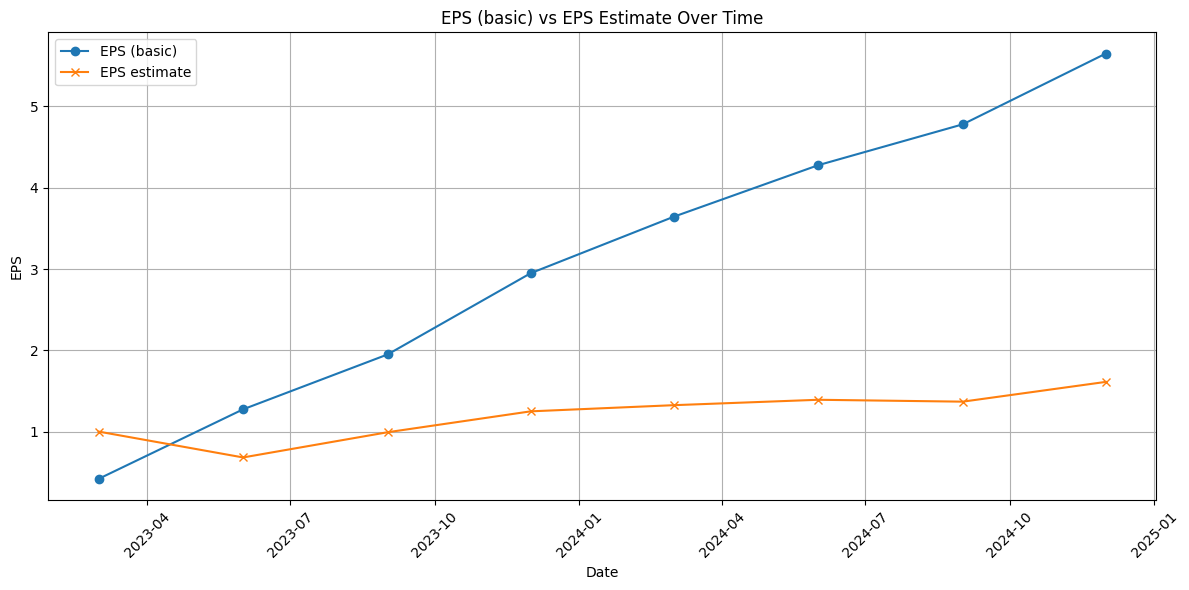

In [19]:
# Convert EPS columns to numeric in case there are strings or missing values
merged_df['EPS (basic)'] = pd.to_numeric(merged_df['EPS (basic)'], errors='coerce')
merged_df['EPS estimate'] = pd.to_numeric(merged_df['EPS estimate'], errors='coerce')

# Drop rows where either value is missing
merged_df.dropna(subset=['EPS (basic)', 'EPS estimate'], inplace=True)

# Calculate the difference between actual EPS and estimated EPS
merged_df['EPS Difference'] = merged_df['EPS (basic)'] - merged_df['EPS estimate']

# Sort by date for proper plotting
merged_df = merged_df.sort_values(by='Date_y')

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date_y'], merged_df['EPS (basic)'], label='EPS (basic)', marker='o')
plt.plot(merged_df['Date_y'], merged_df['EPS estimate'], label='EPS estimate', marker='x')
plt.xlabel('Date')
plt.ylabel('EPS')
plt.title('EPS (basic) vs EPS Estimate Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Convert to numeric in case of bad data
merged_df['EPS (basic)'] = pd.to_numeric(merged_df['EPS (basic)'], errors='coerce')
merged_df['EPS estimate'] = pd.to_numeric(merged_df['EPS estimate'], errors='coerce')

# Drop any rows with missing EPS values
merged_df.dropna(subset=['EPS (basic)', 'EPS estimate'], inplace=True)

# Calculate the EPS difference
merged_df['EPS Difference'] = merged_df['EPS (basic)'] - merged_df['EPS estimate']


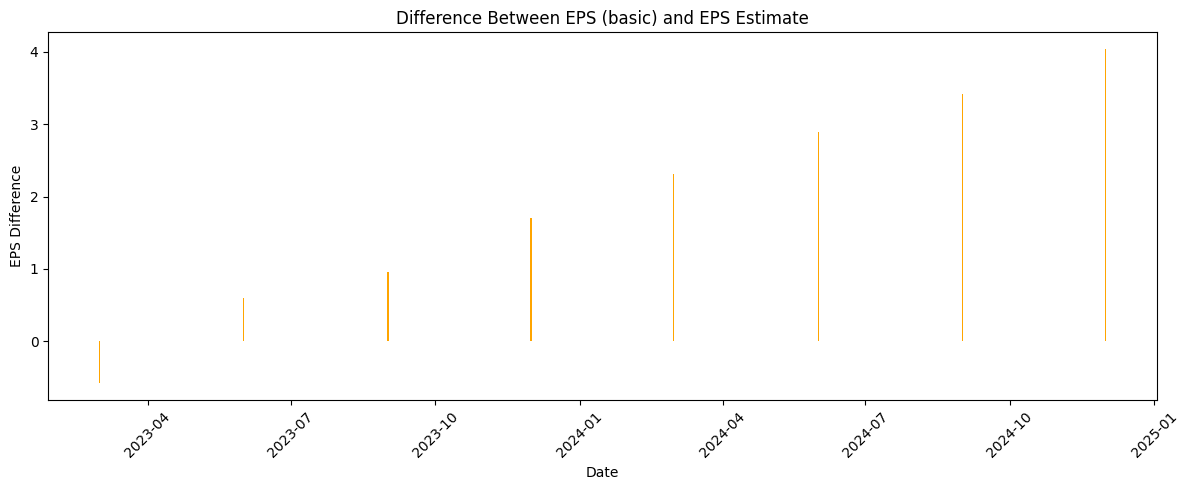

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(merged_df['Date_y'], merged_df['EPS Difference'], color='orange')
plt.xlabel('Date')
plt.ylabel('EPS Difference')
plt.title('Difference Between EPS (basic) and EPS Estimate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


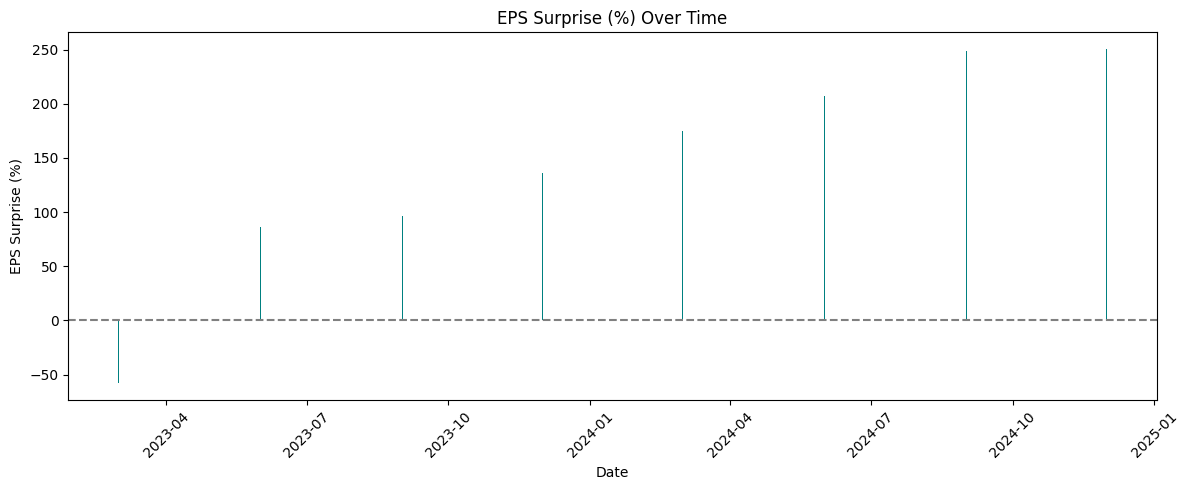

In [22]:
# Avoid division by zero by filtering out zero estimates
merged_df['EPS Surprise (%)'] = ((merged_df['EPS (basic)'] - merged_df['EPS estimate']) / merged_df['EPS estimate'].abs()) * 100
plt.figure(figsize=(12, 5))
plt.bar(merged_df['Date_y'], merged_df['EPS Surprise (%)'], color='teal')
plt.axhline(0, color='gray', linestyle='--')
plt.title('EPS Surprise (%) Over Time')
plt.xlabel('Date')
plt.ylabel('EPS Surprise (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

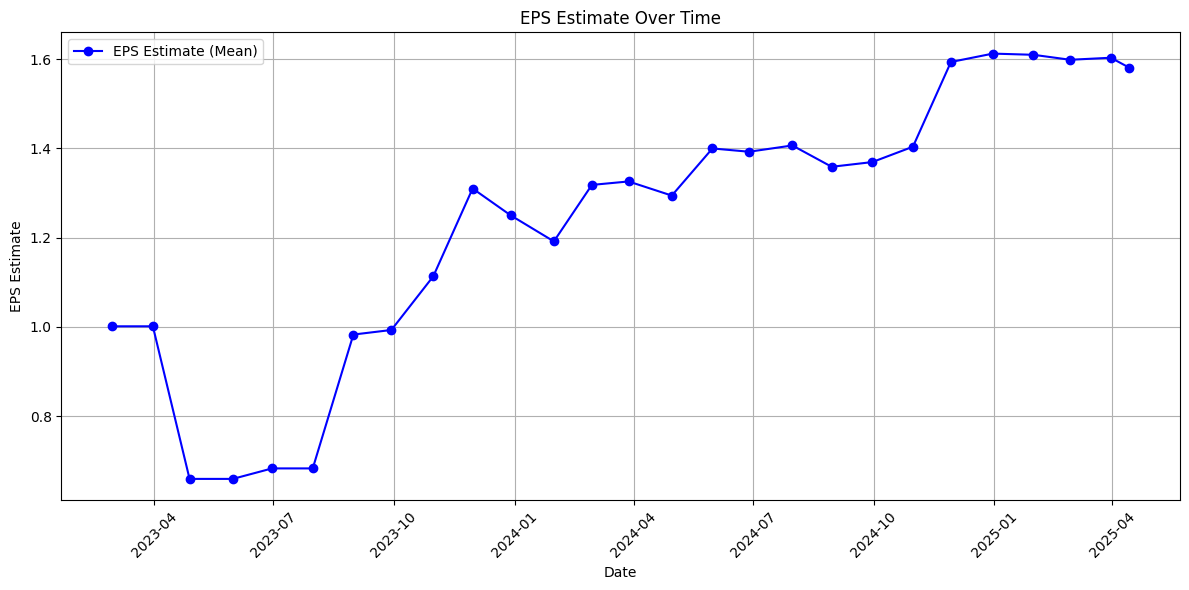

In [23]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the EPS data
df_eps = pd.read_excel("EPS.xlsx", skiprows=2)

# Clean and parse the Date column
df_eps['Date'] = pd.to_datetime(df_eps['Date'], format="%d %b '%y", errors='coerce')

# Convert 'Mean' to numeric
df_eps['Mean'] = pd.to_numeric(df_eps['Mean'], errors='coerce')

# Drop missing or malformed data
df_eps.dropna(subset=['Date', 'Mean'], inplace=True)

# Sort the data
df_eps.sort_values(by='Date', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_eps['Date'], df_eps['Mean'], marker='o', linestyle='-', color='blue', label='EPS Estimate (Mean)')
plt.xlabel('Date')
plt.ylabel('EPS Estimate')
plt.title('EPS Estimate Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6. Analyze the company’s financial health, growth potential, and valuation, highlighting key fundamentals like revenue and profitability, events such as earning beats or market trends, and a valuation about if supports an upside target. In conclusion, you need to provide a investment recommendation supported by the financial analysis you did in Chapter 6.

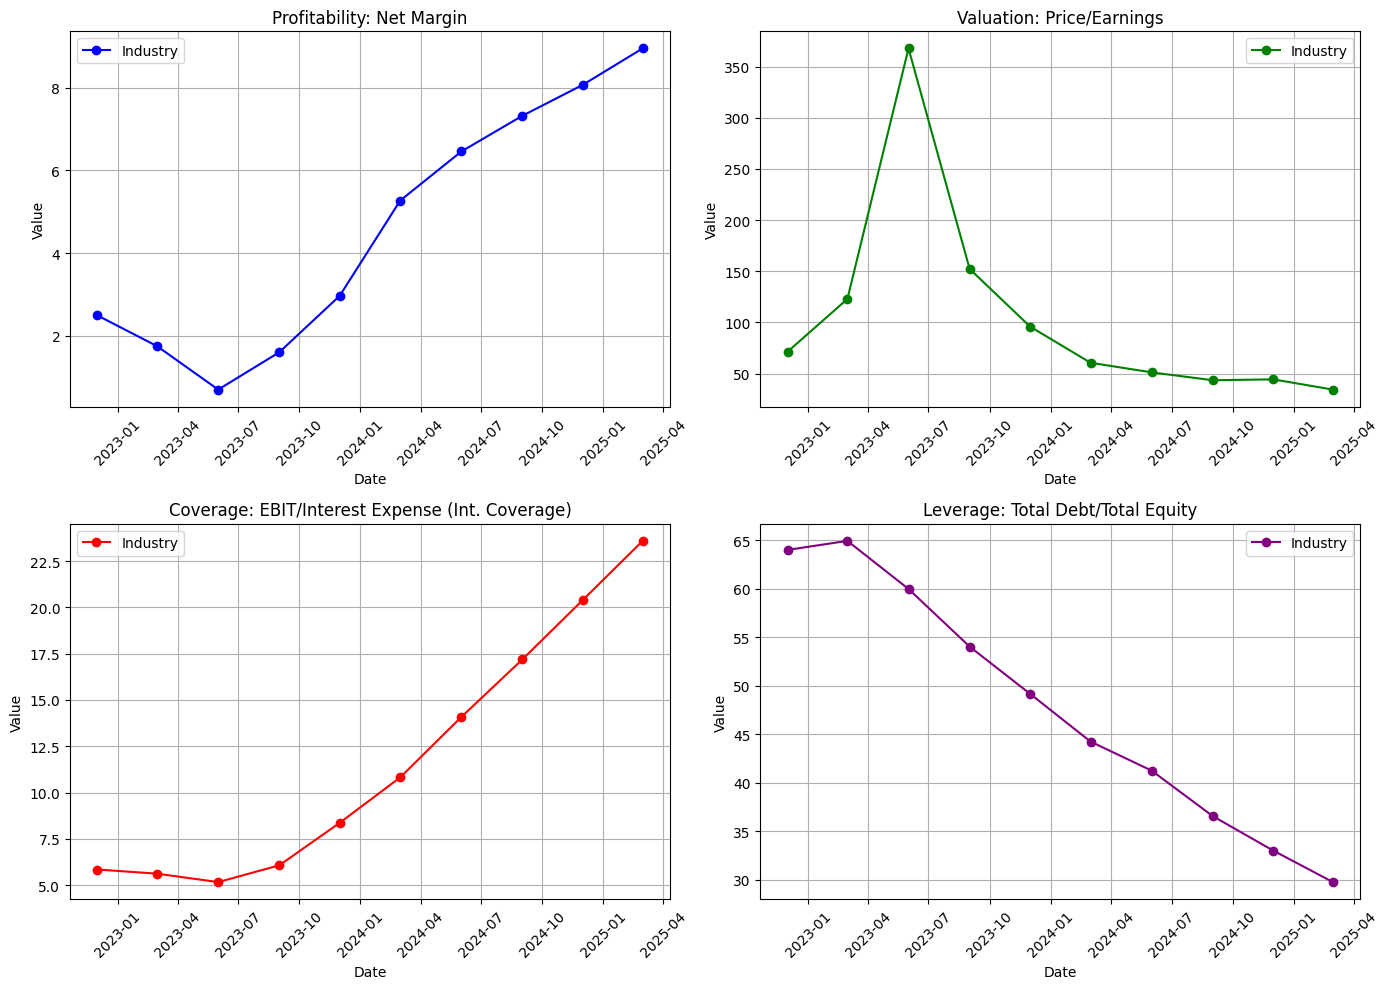

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
file_path = "Ratios Analysis.xlsx"
sheet_name = "FI3550US"

# Read from row 6 (index 5)
df_raw = pd.read_excel(file_path, sheet_name=sheet_name, header=5)

# Remove empty rows/columns
df = df_raw.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Rename the first column
df.rename(columns={df.columns[0]: "Ratio"}, inplace=True)

# Clean the ratio names
df["Ratio"] = df["Ratio"].str.strip()

# Remove any duplicates
df = df.drop_duplicates(subset="Ratio")

# Set Ratio as the index
df.set_index("Ratio", inplace=True)

# Convert all values to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Explicitly set the column headers to the dates from the dataset
dates = ['MAR \'25', 'DEC \'24', 'SEP \'24', 'JUN \'24', 'MAR \'24', 'DEC \'23', 'SEP \'23', 'JUN \'23', 'MAR \'23', 'DEC \'22']
df.columns = dates

# Convert the dates to datetime objects and sort them
df.columns = pd.to_datetime(df.columns, format='%b \'%y')
df = df.reindex(sorted(df.columns), axis=1)

# Define the ratios to plot
ratios = {
    'Profitability': 'Net Margin',
    'Valuation': 'Price/Earnings',
    'Coverage': 'EBIT/Interest Expense (Int. Coverage)',
    'Leverage': 'Total Debt/Total Equity'
}

# Define a list of colors for the plots
colors = ['b', 'g', 'r', 'purple']  # Blue, Green, Red, Purple

# Plot the ratios
plt.figure(figsize=(14, 10))

for i, (category, ratio_name) in enumerate(ratios.items(), start=1):
    plt.subplot(2, 2, i)

    company_col = ratio_name
    industry_col = ratio_name + " - IND"

    if company_col in df.index:
        color = colors[i - 1] if category != 'Leverage' else 'purple'
        plt.plot(df.columns, df.loc[company_col], marker='o', label='Industry', color=color)

    if industry_col in df.index:
        color = colors[i - 1] if category != 'Leverage' else 'purple'
        plt.plot(df.columns, df.loc[industry_col], marker='x', linestyle='--', label='Industry Benchmark', color=color)

    plt.title(f'{category}: {ratio_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

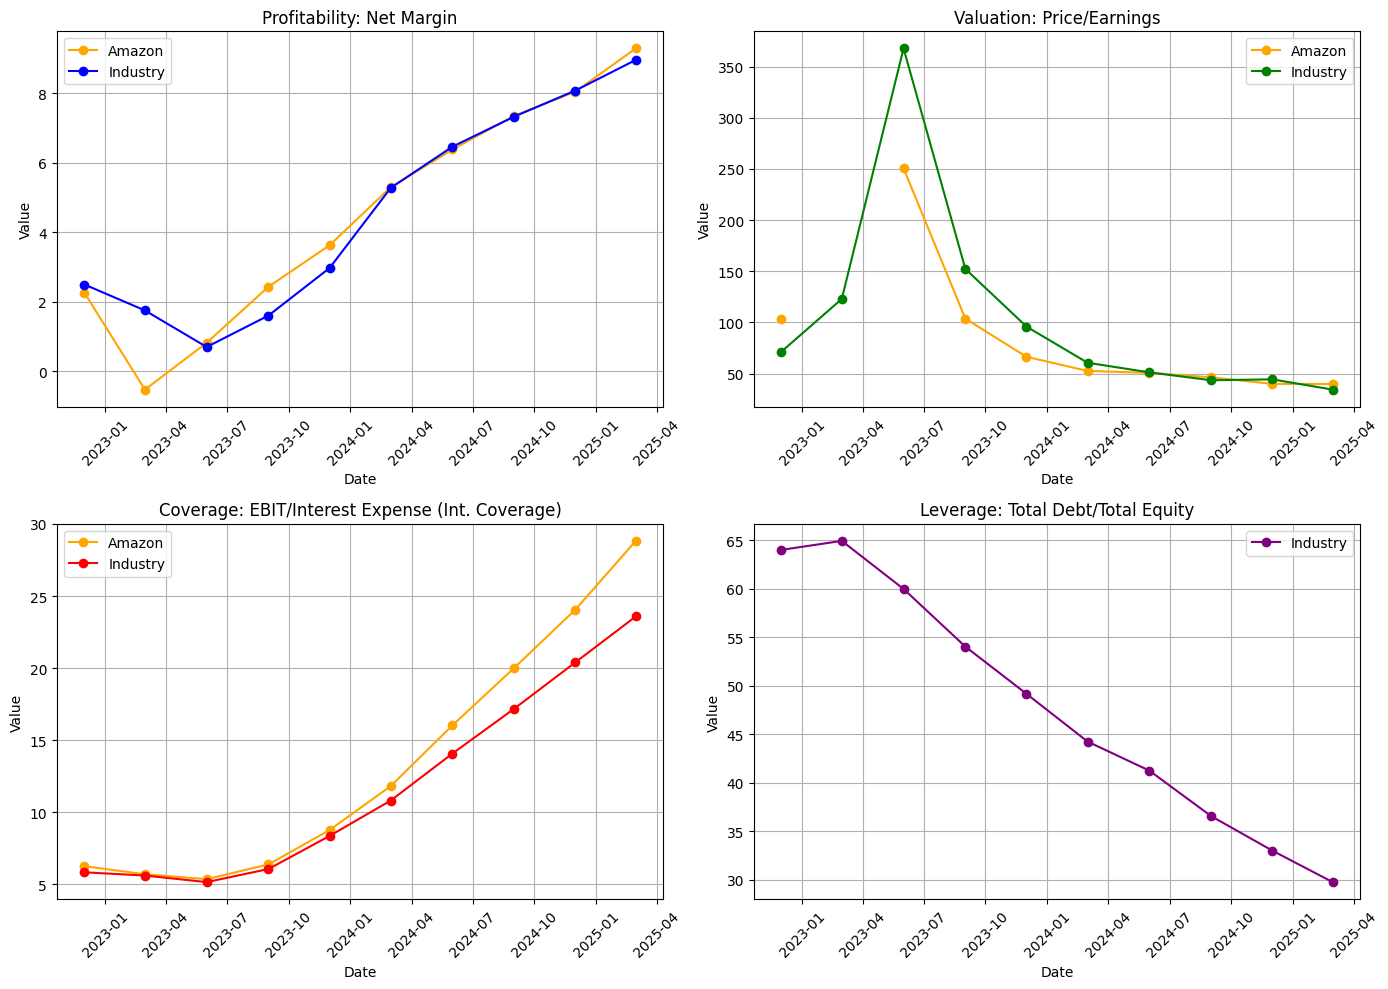

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load both datasets ---
industry_file = "Ratios Analysis.xlsx"
industry_sheet = "FI3550US"

amazon_file = "Ratios.xlsx"


# Read from row 6 (index 5)
df_industry_raw = pd.read_excel(industry_file, sheet_name=industry_sheet, header=5)
df_amazon_raw = pd.read_excel(amazon_file, header=5)

# Function to clean the dataframe
def clean_df(df_raw):
    df = df_raw.dropna(axis=0, how='all').dropna(axis=1, how='all')
    df.rename(columns={df.columns[0]: "Ratio"}, inplace=True)
    df["Ratio"] = df["Ratio"].str.strip()
    df = df.drop_duplicates(subset="Ratio")
    df.set_index("Ratio", inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

# Clean both datasets
df_industry = clean_df(df_industry_raw)
df_amazon = clean_df(df_amazon_raw)

# Set consistent columns/dates
dates = ['MAR \'25', 'DEC \'24', 'SEP \'24', 'JUN \'24', 'MAR \'24', 'DEC \'23', 'SEP \'23', 'JUN \'23', 'MAR \'23', 'DEC \'22']
df_industry.columns = dates
df_amazon.columns = dates

# Convert date strings to datetime and sort columns
date_columns = pd.to_datetime(dates, format='%b \'%y')
df_industry.columns = date_columns
df_amazon.columns = date_columns

df_industry = df_industry.reindex(sorted(df_industry.columns), axis=1)
df_amazon = df_amazon.reindex(sorted(df_amazon.columns), axis=1)

# --- Define the ratios to plot ---
ratios = {
    'Profitability': 'Net Margin',
    'Valuation': 'Price/Earnings',
    'Coverage': 'EBIT/Interest Expense (Int. Coverage)',
    'Leverage': 'Total Debt/Total Equity'
}

# --- Plot ---
plt.figure(figsize=(14, 10))
colors = ['b', 'g', 'r', 'purple']  # Blue, Green, Red, Purple

for i, (category, ratio_name) in enumerate(ratios.items(), start=1):
    plt.subplot(2, 2, i)

    company_col = ratio_name
    industry_col = ratio_name + " - IND"

    if company_col in df_amazon.index:
        plt.plot(df_amazon.columns, df_amazon.loc[company_col], marker='o', label='Amazon', color='orange')

    if company_col in df_industry.index:
        plt.plot(df_industry.columns, df_industry.loc[company_col], marker='o', label='Industry', color=colors[i - 1])

    if industry_col in df_industry.index:
        plt.plot(df_industry.columns, df_industry.loc[industry_col], marker='x', linestyle='--', label='Industry Benchmark', color='grey')

    plt.title(f'{category}: {ratio_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
